# Setup & Import Libraries

In [17]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
os.chdir("/content/drive/MyDrive/deep_learning/spaceship_titanic")
%ls

data/  notebooks/  reports/


# Load Dataset

In [14]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [32]:
df = pd.read_csv("data/test.csv")

# Exploratory Data Analysis - EDA

In [15]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [19]:
print(f"Amount of samples: {len(df)}")

Amount of samples: 8693


## Checking if exist missing values

In [22]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [24]:
def plot_nan_values(dataframe):
    plt.figure(figsize=(10,5))
    sns.heatmap(dataframe.isnull(), yticklabels=False, cmap="viridis")
    plt.ylabel("N observations")
    plt.xlabel("Features")
    plt.show()

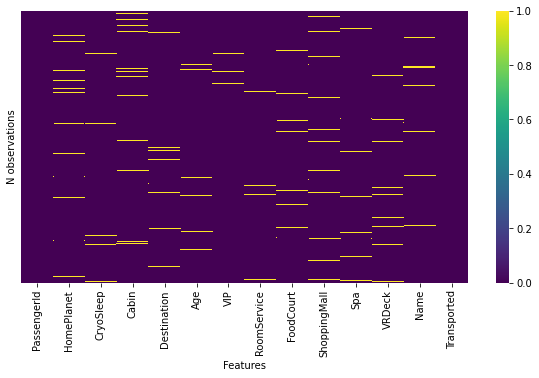

In [25]:
plot_nan_values(df)

### Try the first approach: delete rows with missing values
**Pros:**
* A model trained with the removal of all missing values creates a robust model.

**Cons:**
* Loss of a lot of information;
* Works poorly if the percentage of missing values is execessive comparison to the complete dataset.

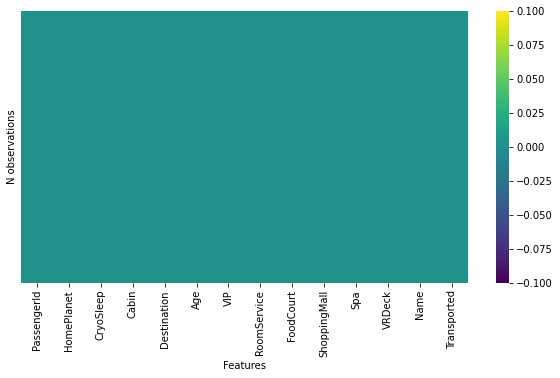

In [26]:
df_non_nan = df.dropna()
plot_nan_values(df_non_nan)

In [27]:
print(f"Amount of samples: {len(df_non_nan)}")

Amount of samples: 6606


## Look into numerical features (Multivariate Analysis)

In [30]:
df_numerical_features = df_non_nan.select_dtypes(include=["float64", "bool"])

In [28]:
def plot_multivariate_analysis(dataframe, hue="Transported"):
    fig = plt.figure(figsize=(10,5))
    sns.pairplot(dataframe, hue=hue, height=2)
    plt.show()

<Figure size 720x360 with 0 Axes>

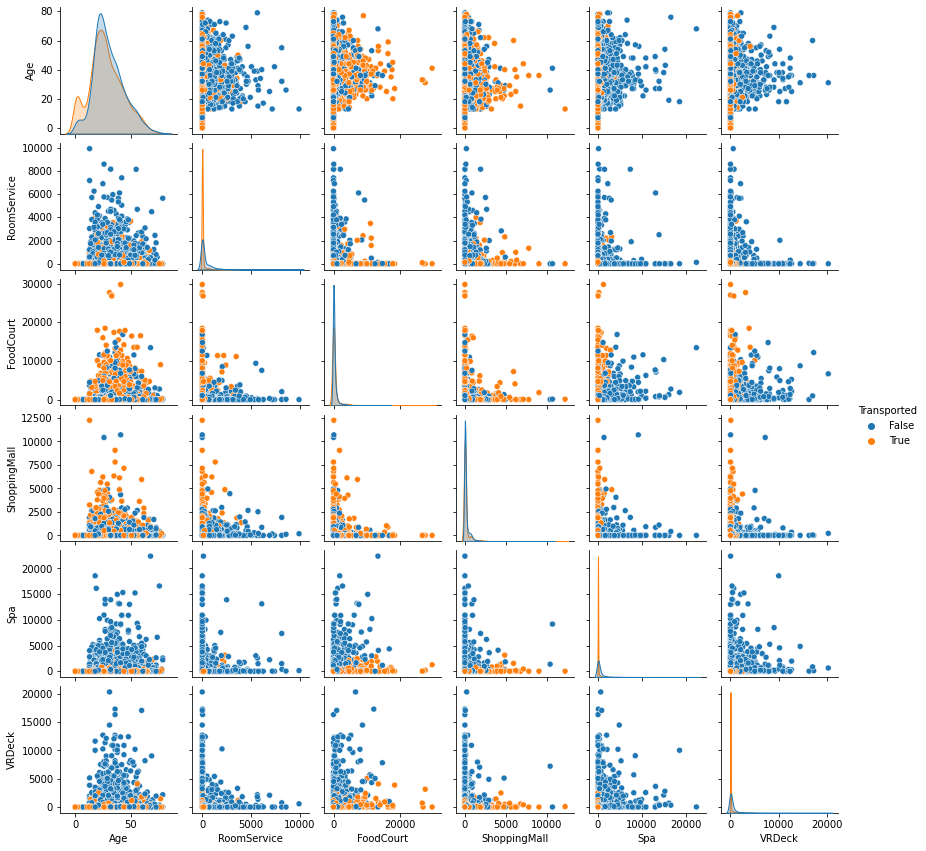

In [31]:
plot_multivariate_analysis(df_numerical_features)

# Preprocessing

In [35]:
target = df_non_nan.Transported.replace({False: 0, True: 1}) # target
data = df_non_nan.drop(["Transported"], axis= 1)

In [36]:
target.value_counts()

1    3327
0    3279
Name: Transported, dtype: int64

In [37]:
print(f"Event Rate: {round(target.mean()*100, 2)}%") # in othe word, this case can be a balanced problem

Event Rate: 50.36%


## Split features into numerical and categorical

In [41]:
numerical_features = data.select_dtypes(include="number")
categorical_features = data.select_dtypes(include="object")

In [45]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           6606 non-null   float64
 1   RoomService   6606 non-null   float64
 2   FoodCourt     6606 non-null   float64
 3   ShoppingMall  6606 non-null   float64
 4   Spa           6606 non-null   float64
 5   VRDeck        6606 non-null   float64
dtypes: float64(6)
memory usage: 361.3 KB


In [46]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  6606 non-null   object
 1   HomePlanet   6606 non-null   object
 2   CryoSleep    6606 non-null   object
 3   Cabin        6606 non-null   object
 4   Destination  6606 non-null   object
 5   VIP          6606 non-null   object
 6   Name         6606 non-null   object
dtypes: object(7)
memory usage: 412.9+ KB


## Preprocessing Numerical Features

In [47]:
def unique_levels(x):
    x = x.value_counts().count()
    return x

def detect_low_dist_value(numerical_features):
    df_value_counts = pd.DataFrame(numerical_features.apply(lambda x: unique_levels(x)))
    df_value_counts.columns = ["feature_levels"]
    return df_value_counts

In [48]:
detect_low_dist_value(numerical_features)

,feature_levels
Age,80
RoomService,1093
FoodCourt,1293
ShoppingMall,984
Spa,1143
VRDeck,1106


### Outlier Analysis Capping and Flooring

In [49]:
numerical_features.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85,
                                         0.90, 0.99])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.894036,222.991674,478.958523,178.356494,313.161520,303.780048
std,14.533429,644.987936,1678.592291,576.328407,1144.016291,1127.142166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000


In [50]:
def outlier_cap(x):
    x = x.clip(lower=x.quantile(0.01))
    x = x.clip(upper=x.quantile(0.99))
    return x

In [51]:
numerical_features = numerical_features.apply(lambda x: outlier_cap(x))
numerical_features.describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.85,
                                         0.90, 0.99])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000,6606.000000
mean,28.847207,207.880949,435.229170,160.138412,275.724985,268.567938
std,14.401468,530.923593,1307.595963,416.352005,814.033587,822.938976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,82.750000,30.000000,65.000000,52.000000


## Preprocessing Categorical Features

In [52]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  6606 non-null   object
 1   HomePlanet   6606 non-null   object
 2   CryoSleep    6606 non-null   object
 3   Cabin        6606 non-null   object
 4   Destination  6606 non-null   object
 5   VIP          6606 non-null   object
 6   Name         6606 non-null   object
dtypes: object(7)
memory usage: 412.9+ KB


### Drop feature don't have any correlation

In [ ]:
categorical_features.drop(["PassengerId", "Name"], axis=1, inplace=True)

In [54]:
categorical_features.head()

,HomePlanet,CryoSleep,Cabin,Destination,VIP
0,Europa,False,B/0/P,TRAPPIST-1e,False
1,Earth,False,F/0/S,TRAPPIST-1e,False
2,Europa,False,A/0/S,TRAPPIST-1e,True
3,Europa,False,A/0/S,TRAPPIST-1e,False
4,Earth,False,F/1/S,TRAPPIST-1e,False


### Dummies the categorical features

In [55]:
def dummies_cat_features(categorical_features):
    return pd.get_dummies(categorical_features, drop_first=True)

categorical_features = dummies_cat_features(categorical_features)
categorical_features.head()

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_A/0/S,Cabin_A/1/S,Cabin_A/10/P,Cabin_A/10/S,Cabin_A/100/S,Cabin_A/101/S,Cabin_A/102/S,...,Cabin_G/994/S,Cabin_G/996/S,Cabin_G/998/S,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/1/P,Cabin_T/3/P,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Put all together

In [56]:
X = pd.concat([categorical_features, numerical_features], axis=1, join="inner")

print(f"Number of obsevations: {X.shape[0]}, Number of featues: {X.shape[1]}")

Number of obsevations: 6606, Number of featues: 5316


# Save for preprocess dataset

In [57]:
import numpy as np

In [58]:
X = X.to_numpy()
y = target.to_numpy()
np.savez("data/train.npz", x=X, y=y)